# ABEL scanning example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
import sys
sys.path.append('../')
from abel import *
import numpy as np

[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation


initializing ocelot...
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


### Define the linac and beams

In [2]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 10e-6, 10e-6 # [m rad]
driver.beta_x, driver.beta_y = 30e-3, 30e-3 # [m]
driver.num_particles = 10000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]

# define stage
stage = StageQuasistatic2d()
stage.driver_source = driver
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 5

# define first stage (half length)
first_stage = StageQuasistatic2d()
first_stage.driver_source = stage.driver_source
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length = stage.length/2
first_stage.plasma_density = stage.plasma_density
first_stage.ramp_beta_mag = stage.ramp_beta_mag

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.1
source.bunch_length = 18e-6 # [m]
source.z_offset = -34e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 5000
source.jitter.t = driver.jitter.t

# define interstage
interstage = InterstageBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.dipole_length = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.dipole_field = 0.5 # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = Linac()
linac.source = source
linac.stage = stage
linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 16

### Run simulation scan

In [3]:
# scan the driver timing jitter
linac.scan('scan_example', 
           lambda obj, val: setattr(obj.stage.driver_source.jitter, 't', val) or obj, 
           np.logspace(-15.5, -13.5, 16),
           label='Driver timing jitter (fs rms)',
           scale=1e-5,
           num_shots_per_step=4, 
           parallel=True,
           overwrite=False);

⠹  27% Tracking shots (16 in parallel) ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17/64 0:01:40 < -:--:--

/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/ABEL/examples/../abel/physics_models/hills_equation.py:45: RuntimeWarning: divide by zero encountered in divide
  C = np.sqrt(2)*kp/dgamma_ds
/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/ABEL/examples/../abel/physics_models/hills_equation.py:50: RuntimeWarning: invalid value encountered in multiply
  Di = (kp**2*x0*scispec.iv(1,A0*1j) + A0*1j*dgamma_ds*xp0*scispec.iv(0,A0*1j))
/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/ABEL/examples/../abel/physics_models/hills_equation.py:51: RuntimeWarning: invalid value encountered in multiply
  Dk = (kp**2*x0*scispec.kv(1,A0*1j) - A0*1j*dgamma_ds*xp0*scispec.kv(0,A0*1j))
/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/ABEL/examples/../abel/physics_models/hills_equation.py:52: RuntimeWarning: invalid value encountered in multiply
  E = kp**2*(scispec.iv(1,A0*1j)*scispec.kv(0,A0*1j) + scispec.iv(0,A0*1j)*scispec.kv(1,A0*1j))*1j
/Users/ben_c

eV, InterstageBasic, stage 12)
Tracking element 26 (s = 304.1 m, -1.60 nC, 404.2 GeV, StageQuasistatic2d, stage 13)
Tracking element 27 (s = 334.5 m, -1.60 nC, 404.2 GeV, InterstageBasic, stage 13)
Tracking element 28 (s = 339.5 m, -1.60 nC, 435.9 GeV, StageQuasistatic2d, stage 14)
Tracking element 29 (s = 371.1 m, -1.60 nC, 435.9 GeV, InterstageBasic, stage 14)
Tracking element 30 (s = 376.1 m, -1.60 nC, 467.9 GeV, StageQuasistatic2d, stage 15)
Tracking element 31 (s = 408.8 m, -1.60 nC, 467.9 GeV, InterstageBasic, stage 15)
Tracking element 32 (s = 413.8 m, -1.60 nC, 499.9 GeV, StageQuasistatic2d, stage 16)
>> SHOT 33/64
Tracking element 1 (s = 0.0 m, -1.60 nC, 5.0 GeV, SourceBasic, stage 0)
Tracking element 2 (s = 2.5 m, -1.60 nC, 20.9 GeV, StageQuasistatic2d, stage 1)
Tracking element 3 (s = 9.4 m, -1.60 nC, 20.9 GeV, InterstageBasic, stage 1)
Tracking element 4 (s = 14.4 m, -1.60 nC, 52.7 GeV, StageQuasistatic2d, stage 2)
Tracking element 5 (s = 25.4 m, -1.60 nC, 52.7 GeV, Interst

 Dk*scispec.iv(0,A*1j))/E)
/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/ABEL/examples/../abel/physics_models/hills_equation.py:56: RuntimeWarning: invalid value encountered in multiply
  xp = np.real((dgamma_ds*C**2/(2*A*E))*(Dk*scispec.iv(1,A*1j) - Di*scispec.kv(1,A*1j)))


king element 30 (s = 376.1 m, -1.60 nC, 467.6 GeV, StageQuasistatic2d, stage 15)
Tracking element 31 (s = 408.8 m, -1.60 nC, 467.6 GeV, InterstageBasic, stage 15)
Tracking element 32 (s = 413.8 m, -1.60 nC, 499.4 GeV, StageQuasistatic2d, stage 16)
>> SHOT 34/64
Tracking element 1 (s = 0.0 m, -1.60 nC, 5.0 GeV, SourceBasic, stage 0)
Tracking element 2 (s = 2.5 m, -1.60 nC, 21.0 GeV, StageQuasistatic2d, stage 1)
Tracking element 3 (s = 9.4 m, -1.60 nC, 21.0 GeV, InterstageBasic, stage 1)
Tracking element 4 (s = 14.4 m, -1.60 nC, 53.0 GeV, StageQuasistatic2d, stage 2)
Tracking element 5 (s = 25.4 m, -1.60 nC, 53.0 GeV, InterstageBasic, stage 2)
Tracking element 6 (s = 30.4 m, -1.60 nC, 84.9 GeV, StageQuasistatic2d, stage 3)
Tracking element 7 (s = 44.4 m, -1.60 nC, 84.9 GeV, InterstageBasic, stage 3)
Tracking element 8 (s = 49.4 m, -1.60 nC, 116.8 GeV, StageQuasistatic2d, stage 4)
Tracking element 9 (s = 65.7 m, -1.60 nC, 116.8 GeV, InterstageBasic, stage 4)
Tracking element 10 (s = 70.7 

### Plot wakefield

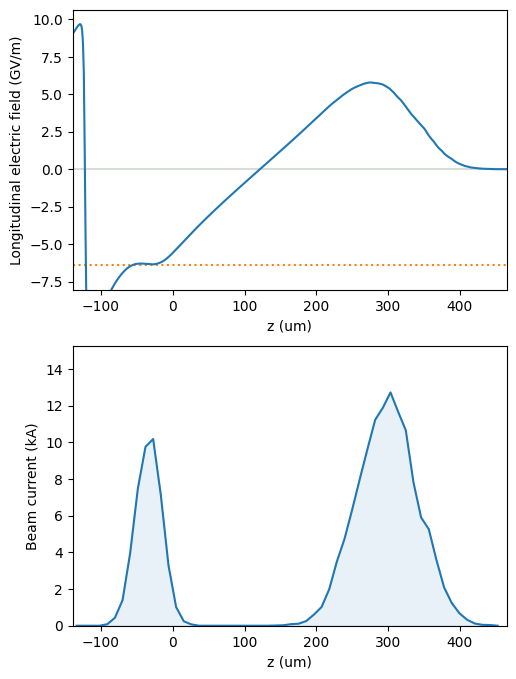

In [4]:
linac.stages[0].plot_wakefield()

### Plot scan

ValueError: 'yerr' must not contain negative values

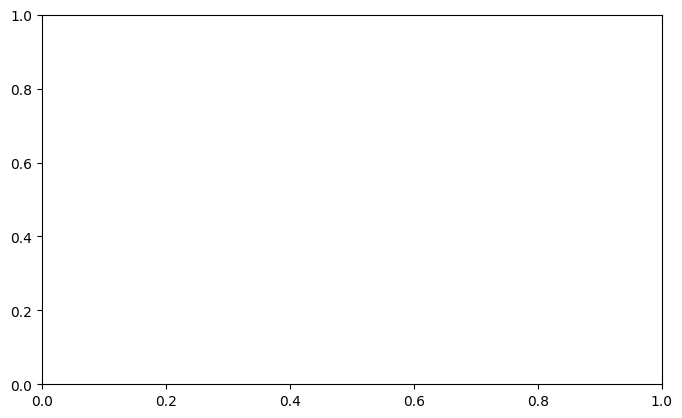

In [5]:
# plot energy spread vs bunch length
linac.plot_beam_function(Beam.charge, label='Charge (nC)', scale=-1e-9, xscale='log', yscale='linear')
linac.plot_beam_function(Beam.energy, label='Energy (GeV)', scale=1e9, xscale='log', yscale='linear')
linac.plot_beam_function(Beam.rel_energy_spread, label='Energy spread (%)', scale=1e-2, xscale='log')
linac.plot_beam_function(Beam.norm_emittance_x, label='Norm. emittance, x (mm mrad)', scale=1e-6, xscale='log')
linac.plot_beam_function(Beam.norm_emittance_y, label='Norm. emittance, y (mm mrad)', scale=1e-6, xscale='log')